### Step 1: Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from time import sleep
import yfinance as yf
from scipy import stats

In [2]:
# Calculate the rolling hedge ratio for Russell 2000 and SP400
## Step 1: Import Russell 2000 and S&P 400 
russell_df = yf.download('^RUT', start = '2021-02-10', end = '2023-01-18', progress = False)
sp400_df = yf.download('^SP400', start = '2021-02-10', end = '2023-01-18', progress = False)

russell = russell_df[['Close']]
Russell = russell.rename(columns = {'Close': 'russell_close'})

sp400 = sp400_df[['Close']]
Sp400 = sp400.rename(columns = {'Close': 'sp400_close'})

prices = pd.concat([Russell, Sp400], axis = 1)
prices = prices.dropna()

In [3]:
def hedge_ratio_lst(data, lookback):
    hedge_ratio = np.zeros(len(data.index))
    
    for t in range(lookback, len(data.index) - 1):
        x = data[data.columns[0]].iloc[t - lookback: t+1]
        y = data[data.columns[1]].iloc[t - lookback: t+1]
        
        hedge_ratio[t] = stats.linregress(x, y).slope
        
    x = data[data.columns[0]].iloc[t+1-lookback: t+2]
    y = data[data.columns[1]].iloc[t+1-lookback: t+2] 
    
    hedge_ratio[-1] = stats.linregress(x, y).slope
       
    hedge_dataframe = pd.DataFrame(hedge_ratio, columns = ['hedge_ratio'], index = data.index)
    
    return hedge_dataframe
    

In [4]:
def concat_two_data(data1, data2):
    data1['hedge_ratio'] = np.zeros(len(data1.index))
    index = data1.index
    for i in range(len(data2.index)):
        if str(data2.index[i])[:10] in index:
            data1['hedge_ratio'].loc[str(data2.index[i])[:10]] = float(data2.loc[str(data2.index[i])[:10]])
    
    return data1

In [5]:
data = pd.read_csv('data.csv', index_col=0)
df = hedge_ratio_lst(prices, 365)

In [6]:
data = concat_two_data(data, df)
data

,RUT,SP400,OVV,AR,CHK,SWN,RRC,BJ,CAR,PDCE,...,WH,YELP,XMMO,XMHQ,IJH,MDY,IVOO,SPMD,SPY,hedge_ratio
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-10,2282.439941,2519.239990,20.090000,8.400000,44.990002,4.38,10.190000,43.689999,43.270000,28.090000,...,62.299999,36.790001,86.129997,73.769997,251.520004,459.359985,170.050003,44.189999,390.079987,0.000000
2021-02-11,2285.320068,2535.250000,20.549999,8.110000,42.799999,4.17,9.570000,42.860001,42.750000,27.820000,...,60.919998,37.910000,87.500000,74.370003,253.089996,462.190002,171.119995,44.459999,390.709991,0.000000
2021-02-12,2289.360107,2544.550049,21.690001,9.000000,42.509998,4.34,10.160000,43.000000,44.709999,28.600000,...,60.200001,36.970001,88.029999,74.639999,253.850006,463.579987,171.740005,44.630001,392.640015,0.000000
2021-02-16,2272.889893,2539.229980,22.700001,9.490000,43.549999,4.51,10.940000,43.459999,45.700001,29.250000,...,60.700001,36.160000,87.589996,74.620003,253.389999,462.790009,171.350006,44.560001,392.299988,0.000000
2021-02-17,2256.110107,2525.610107,22.930000,9.780000,44.259998,4.60,11.470000,43.810001,42.820000,29.190001,...,59.849998,35.880001,87.330002,74.269997,252.130005,460.279999,170.520004,44.330002,392.390015,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-10,1822.650024,2514.520020,49.000000,29.000000,88.370003,5.68,24.420000,67.050003,171.669998,62.889999,...,70.389999,28.469999,76.239998,71.489998,250.440002,458.440002,169.479996,44.020000,390.579987,0.808186
2023-01-11,1844.050049,2545.360107,49.020000,28.760000,89.570000,5.74,24.629999,69.709999,182.000000,63.400002,...,71.839996,28.680000,76.820000,72.320000,253.500000,464.119995,171.550003,44.570000,395.519989,0.808334
2023-01-12,1876.060059,2568.370117,50.869999,29.950001,91.489998,6.00,25.610001,69.349998,189.339996,66.150002,...,72.540001,28.860001,77.690002,72.849998,255.880005,468.359985,173.000000,44.970001,396.959991,0.808529


In [7]:
data['close'] = abs(data['hedge_ratio']*data['SP400'] - data['RUT'])
data

,RUT,SP400,OVV,AR,CHK,SWN,RRC,BJ,CAR,PDCE,...,YELP,XMMO,XMHQ,IJH,MDY,IVOO,SPMD,SPY,hedge_ratio,close
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-10,2282.439941,2519.239990,20.090000,8.400000,44.990002,4.38,10.190000,43.689999,43.270000,28.090000,...,36.790001,86.129997,73.769997,251.520004,459.359985,170.050003,44.189999,390.079987,0.000000,2282.439941
2021-02-11,2285.320068,2535.250000,20.549999,8.110000,42.799999,4.17,9.570000,42.860001,42.750000,27.820000,...,37.910000,87.500000,74.370003,253.089996,462.190002,171.119995,44.459999,390.709991,0.000000,2285.320068
2021-02-12,2289.360107,2544.550049,21.690001,9.000000,42.509998,4.34,10.160000,43.000000,44.709999,28.600000,...,36.970001,88.029999,74.639999,253.850006,463.579987,171.740005,44.630001,392.640015,0.000000,2289.360107
2021-02-16,2272.889893,2539.229980,22.700001,9.490000,43.549999,4.51,10.940000,43.459999,45.700001,29.250000,...,36.160000,87.589996,74.620003,253.389999,462.790009,171.350006,44.560001,392.299988,0.000000,2272.889893
2021-02-17,2256.110107,2525.610107,22.930000,9.780000,44.259998,4.60,11.470000,43.810001,42.820000,29.190001,...,35.880001,87.330002,74.269997,252.130005,460.279999,170.520004,44.330002,392.390015,0.000000,2256.110107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-10,1822.650024,2514.520020,49.000000,29.000000,88.370003,5.68,24.420000,67.050003,171.669998,62.889999,...,28.469999,76.239998,71.489998,250.440002,458.440002,169.479996,44.020000,390.579987,0.808186,209.550310
2023-01-11,1844.050049,2545.360107,49.020000,28.760000,89.570000,5.74,24.629999,69.709999,182.000000,63.400002,...,28.680000,76.820000,72.320000,253.500000,464.119995,171.550003,44.570000,395.519989,0.808334,213.449905
2023-01-12,1876.060059,2568.370117,50.869999,29.950001,91.489998,6.00,25.610001,69.349998,189.339996,66.150002,...,28.860001,77.690002,72.849998,255.880005,468.359985,173.000000,44.970001,396.959991,0.808529,200.542285


In [8]:
# drop "hedge_ratio" column
data.drop(['hedge_ratio'], axis = 1, inplace = True)
data

,RUT,SP400,OVV,AR,CHK,SWN,RRC,BJ,CAR,PDCE,...,WH,YELP,XMMO,XMHQ,IJH,MDY,IVOO,SPMD,SPY,close
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-10,2282.439941,2519.239990,20.090000,8.400000,44.990002,4.38,10.190000,43.689999,43.270000,28.090000,...,62.299999,36.790001,86.129997,73.769997,251.520004,459.359985,170.050003,44.189999,390.079987,2282.439941
2021-02-11,2285.320068,2535.250000,20.549999,8.110000,42.799999,4.17,9.570000,42.860001,42.750000,27.820000,...,60.919998,37.910000,87.500000,74.370003,253.089996,462.190002,171.119995,44.459999,390.709991,2285.320068
2021-02-12,2289.360107,2544.550049,21.690001,9.000000,42.509998,4.34,10.160000,43.000000,44.709999,28.600000,...,60.200001,36.970001,88.029999,74.639999,253.850006,463.579987,171.740005,44.630001,392.640015,2289.360107
2021-02-16,2272.889893,2539.229980,22.700001,9.490000,43.549999,4.51,10.940000,43.459999,45.700001,29.250000,...,60.700001,36.160000,87.589996,74.620003,253.389999,462.790009,171.350006,44.560001,392.299988,2272.889893
2021-02-17,2256.110107,2525.610107,22.930000,9.780000,44.259998,4.60,11.470000,43.810001,42.820000,29.190001,...,59.849998,35.880001,87.330002,74.269997,252.130005,460.279999,170.520004,44.330002,392.390015,2256.110107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-10,1822.650024,2514.520020,49.000000,29.000000,88.370003,5.68,24.420000,67.050003,171.669998,62.889999,...,70.389999,28.469999,76.239998,71.489998,250.440002,458.440002,169.479996,44.020000,390.579987,209.550310
2023-01-11,1844.050049,2545.360107,49.020000,28.760000,89.570000,5.74,24.629999,69.709999,182.000000,63.400002,...,71.839996,28.680000,76.820000,72.320000,253.500000,464.119995,171.550003,44.570000,395.519989,213.449905
2023-01-12,1876.060059,2568.370117,50.869999,29.950001,91.489998,6.00,25.610001,69.349998,189.339996,66.150002,...,72.540001,28.860001,77.690002,72.849998,255.880005,468.359985,173.000000,44.970001,396.959991,200.542285


In [9]:
data['close_1'] = data['close'].shift()
data['close_2'] = data['close'].shift()
data

,RUT,SP400,OVV,AR,CHK,SWN,RRC,BJ,CAR,PDCE,...,XMMO,XMHQ,IJH,MDY,IVOO,SPMD,SPY,close,close_1,close_2
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-10,2282.439941,2519.239990,20.090000,8.400000,44.990002,4.38,10.190000,43.689999,43.270000,28.090000,...,86.129997,73.769997,251.520004,459.359985,170.050003,44.189999,390.079987,2282.439941,NaN,NaN
2021-02-11,2285.320068,2535.250000,20.549999,8.110000,42.799999,4.17,9.570000,42.860001,42.750000,27.820000,...,87.500000,74.370003,253.089996,462.190002,171.119995,44.459999,390.709991,2285.320068,2282.439941,2282.439941
2021-02-12,2289.360107,2544.550049,21.690001,9.000000,42.509998,4.34,10.160000,43.000000,44.709999,28.600000,...,88.029999,74.639999,253.850006,463.579987,171.740005,44.630001,392.640015,2289.360107,2285.320068,2285.320068
2021-02-16,2272.889893,2539.229980,22.700001,9.490000,43.549999,4.51,10.940000,43.459999,45.700001,29.250000,...,87.589996,74.620003,253.389999,462.790009,171.350006,44.560001,392.299988,2272.889893,2289.360107,2289.360107
2021-02-17,2256.110107,2525.610107,22.930000,9.780000,44.259998,4.60,11.470000,43.810001,42.820000,29.190001,...,87.330002,74.269997,252.130005,460.279999,170.520004,44.330002,392.390015,2256.110107,2272.889893,2272.889893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-10,1822.650024,2514.520020,49.000000,29.000000,88.370003,5.68,24.420000,67.050003,171.669998,62.889999,...,76.239998,71.489998,250.440002,458.440002,169.479996,44.020000,390.579987,209.550310,216.145905,216.145905
2023-01-11,1844.050049,2545.360107,49.020000,28.760000,89.570000,5.74,24.629999,69.709999,182.000000,63.400002,...,76.820000,72.320000,253.500000,464.119995,171.550003,44.570000,395.519989,213.449905,209.550310,209.550310
2023-01-12,1876.060059,2568.370117,50.869999,29.950001,91.489998,6.00,25.610001,69.349998,189.339996,66.150002,...,77.690002,72.849998,255.880005,468.359985,173.000000,44.970001,396.959991,200.542285,213.449905,213.449905


In [10]:
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]

data['rsi_14'] = get_rsi(data['close'], 14)
data

,RUT,SP400,OVV,AR,CHK,SWN,RRC,BJ,CAR,PDCE,...,XMHQ,IJH,MDY,IVOO,SPMD,SPY,close,close_1,close_2,rsi_14
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-10,2282.439941,2519.239990,20.090000,8.400000,44.990002,4.38,10.190000,43.689999,43.270000,28.090000,...,73.769997,251.520004,459.359985,170.050003,44.189999,390.079987,2282.439941,NaN,NaN,NaN
2021-02-11,2285.320068,2535.250000,20.549999,8.110000,42.799999,4.17,9.570000,42.860001,42.750000,27.820000,...,74.370003,253.089996,462.190002,171.119995,44.459999,390.709991,2285.320068,2282.439941,2282.439941,NaN
2021-02-12,2289.360107,2544.550049,21.690001,9.000000,42.509998,4.34,10.160000,43.000000,44.709999,28.600000,...,74.639999,253.850006,463.579987,171.740005,44.630001,392.640015,2289.360107,2285.320068,2285.320068,NaN
2021-02-16,2272.889893,2539.229980,22.700001,9.490000,43.549999,4.51,10.940000,43.459999,45.700001,29.250000,...,74.620003,253.389999,462.790009,171.350006,44.560001,392.299988,2272.889893,2289.360107,2289.360107,NaN
2021-02-17,2256.110107,2525.610107,22.930000,9.780000,44.259998,4.60,11.470000,43.810001,42.820000,29.190001,...,74.269997,252.130005,460.279999,170.520004,44.330002,392.390015,2256.110107,2272.889893,2272.889893,52.722412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-10,1822.650024,2514.520020,49.000000,29.000000,88.370003,5.68,24.420000,67.050003,171.669998,62.889999,...,71.489998,250.440002,458.440002,169.479996,44.020000,390.579987,209.550310,216.145905,216.145905,68.350142
2023-01-11,1844.050049,2545.360107,49.020000,28.760000,89.570000,5.74,24.629999,69.709999,182.000000,63.400002,...,72.320000,253.500000,464.119995,171.550003,44.570000,395.519989,213.449905,209.550310,209.550310,70.063518
2023-01-12,1876.060059,2568.370117,50.869999,29.950001,91.489998,6.00,25.610001,69.349998,189.339996,66.150002,...,72.849998,255.880005,468.359985,173.000000,44.970001,396.959991,200.542285,213.449905,213.449905,58.730274


In [11]:
def get_macd(price, slow, fast, smooth):
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    frames =  [macd, signal, hist]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df


data['macd'] = get_macd(data['close'], 26, 12, 9)[['macd']]
data

,RUT,SP400,OVV,AR,CHK,SWN,RRC,BJ,CAR,PDCE,...,IJH,MDY,IVOO,SPMD,SPY,close,close_1,close_2,rsi_14,macd
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-10,2282.439941,2519.239990,20.090000,8.400000,44.990002,4.38,10.190000,43.689999,43.270000,28.090000,...,251.520004,459.359985,170.050003,44.189999,390.079987,2282.439941,NaN,NaN,NaN,0.000000
2021-02-11,2285.320068,2535.250000,20.549999,8.110000,42.799999,4.17,9.570000,42.860001,42.750000,27.820000,...,253.089996,462.190002,171.119995,44.459999,390.709991,2285.320068,2282.439941,2282.439941,NaN,0.229754
2021-02-12,2289.360107,2544.550049,21.690001,9.000000,42.509998,4.34,10.160000,43.000000,44.709999,28.600000,...,253.850006,463.579987,171.740005,44.630001,392.640015,2289.360107,2285.320068,2285.320068,NaN,0.729424
2021-02-16,2272.889893,2539.229980,22.700001,9.490000,43.549999,4.51,10.940000,43.459999,45.700001,29.250000,...,253.389999,462.790009,171.350006,44.560001,392.299988,2272.889893,2289.360107,2289.360107,NaN,-0.201272
2021-02-17,2256.110107,2525.610107,22.930000,9.780000,44.259998,4.60,11.470000,43.810001,42.820000,29.190001,...,252.130005,460.279999,170.520004,44.330002,392.390015,2256.110107,2272.889893,2272.889893,52.722412,-2.266714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-10,1822.650024,2514.520020,49.000000,29.000000,88.370003,5.68,24.420000,67.050003,171.669998,62.889999,...,250.440002,458.440002,169.479996,44.020000,390.579987,209.550310,216.145905,216.145905,68.350142,19.188906
2023-01-11,1844.050049,2545.360107,49.020000,28.760000,89.570000,5.74,24.629999,69.709999,182.000000,63.400002,...,253.500000,464.119995,171.550003,44.570000,395.519989,213.449905,209.550310,209.550310,70.063518,18.435129
2023-01-12,1876.060059,2568.370117,50.869999,29.950001,91.489998,6.00,25.610001,69.349998,189.339996,66.150002,...,255.880005,468.359985,173.000000,44.970001,396.959991,200.542285,213.449905,213.449905,58.730274,16.604808


In [12]:
data['rsi_14_1'] = data['rsi_14'].shift()
data['rsi_14_2'] = data['rsi_14_1'].shift()

data['macd_1'] = data['macd'].shift()
data['macd_2'] = data['macd_1'].shift()


In [13]:
data

,RUT,SP400,OVV,AR,CHK,SWN,RRC,BJ,CAR,PDCE,...,SPY,close,close_1,close_2,rsi_14,macd,rsi_14_1,rsi_14_2,macd_1,macd_2
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-10,2282.439941,2519.239990,20.090000,8.400000,44.990002,4.38,10.190000,43.689999,43.270000,28.090000,...,390.079987,2282.439941,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
2021-02-11,2285.320068,2535.250000,20.549999,8.110000,42.799999,4.17,9.570000,42.860001,42.750000,27.820000,...,390.709991,2285.320068,2282.439941,2282.439941,NaN,0.229754,NaN,NaN,0.000000,NaN
2021-02-12,2289.360107,2544.550049,21.690001,9.000000,42.509998,4.34,10.160000,43.000000,44.709999,28.600000,...,392.640015,2289.360107,2285.320068,2285.320068,NaN,0.729424,NaN,NaN,0.229754,0.000000
2021-02-16,2272.889893,2539.229980,22.700001,9.490000,43.549999,4.51,10.940000,43.459999,45.700001,29.250000,...,392.299988,2272.889893,2289.360107,2289.360107,NaN,-0.201272,NaN,NaN,0.729424,0.229754
2021-02-17,2256.110107,2525.610107,22.930000,9.780000,44.259998,4.60,11.470000,43.810001,42.820000,29.190001,...,392.390015,2256.110107,2272.889893,2272.889893,52.722412,-2.266714,NaN,NaN,-0.201272,0.729424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-10,1822.650024,2514.520020,49.000000,29.000000,88.370003,5.68,24.420000,67.050003,171.669998,62.889999,...,390.579987,209.550310,216.145905,216.145905,68.350142,19.188906,75.100802,78.249322,20.268938,20.681079
2023-01-11,1844.050049,2545.360107,49.020000,28.760000,89.570000,5.74,24.629999,69.709999,182.000000,63.400002,...,395.519989,213.449905,209.550310,209.550310,70.063518,18.435129,68.350142,75.100802,19.188906,20.268938
2023-01-12,1876.060059,2568.370117,50.869999,29.950001,91.489998,6.00,25.610001,69.349998,189.339996,66.150002,...,396.959991,200.542285,213.449905,213.449905,58.730274,16.604808,70.063518,68.350142,18.435129,19.188906


In [14]:
data = data.dropna()

In [15]:
data

,RUT,SP400,OVV,AR,CHK,SWN,RRC,BJ,CAR,PDCE,...,SPY,close,close_1,close_2,rsi_14,macd,rsi_14_1,rsi_14_2,macd_1,macd_2
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-19,2266.689941,2535.389893,21.360001,8.960000,44.000000,4.27,10.170000,44.660000,48.750000,28.690001,...,390.029999,2266.689941,2218.389893,2218.389893,55.802758,-6.541958,32.976659,52.722412,-6.868127,-2.266714
2021-02-22,2251.070068,2527.020020,22.620001,8.760000,43.840000,4.22,10.300000,43.130001,50.500000,30.660000,...,387.029999,2251.070068,2266.689941,2266.689941,49.885816,-7.457890,55.802758,32.976659,-6.541958,-6.868127
2021-02-23,2231.310059,2530.729980,23.350000,8.920000,43.660000,4.14,10.430000,41.840000,54.500000,31.320000,...,387.500000,2231.310059,2251.070068,2251.070068,43.589103,-9.666807,49.885816,55.802758,-7.457890,-6.541958
2021-02-24,2284.379883,2577.699951,23.650000,9.540000,45.000000,4.32,10.690000,42.529999,55.900002,33.580002,...,391.769989,2284.379883,2231.310059,2231.310059,58.675604,-7.053787,43.589103,49.885816,-9.666807,-7.457890
2021-02-25,2200.169922,2498.689941,22.799999,9.250000,44.750000,4.21,10.250000,40.910000,53.820000,35.810001,...,382.329987,2200.169922,2284.379883,2284.379883,40.271234,-11.643768,58.675604,43.589103,-7.053787,-9.666807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-10,1822.650024,2514.520020,49.000000,29.000000,88.370003,5.68,24.420000,67.050003,171.669998,62.889999,...,390.579987,209.550310,216.145905,216.145905,68.350142,19.188906,75.100802,78.249322,20.268938,20.681079
2023-01-11,1844.050049,2545.360107,49.020000,28.760000,89.570000,5.74,24.629999,69.709999,182.000000,63.400002,...,395.519989,213.449905,209.550310,209.550310,70.063518,18.435129,68.350142,75.100802,19.188906,20.268938
2023-01-12,1876.060059,2568.370117,50.869999,29.950001,91.489998,6.00,25.610001,69.349998,189.339996,66.150002,...,396.959991,200.542285,213.449905,213.449905,58.730274,16.604808,70.063518,68.350142,18.435129,19.188906


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 481 entries, 2021-02-19 to 2023-01-17
Data columns (total 53 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RUT       481 non-null    float64
 1   SP400     481 non-null    float64
 2   OVV       481 non-null    float64
 3   AR        481 non-null    float64
 4   CHK       481 non-null    float64
 5   SWN       481 non-null    float64
 6   RRC       481 non-null    float64
 7   BJ        481 non-null    float64
 8   CAR       481 non-null    float64
 9   PDCE      481 non-null    float64
 10  LSCC      481 non-null    float64
 11  WSC       481 non-null    float64
 12  PFGC      481 non-null    float64
 13  TTEK      481 non-null    float64
 14  HR        481 non-null    float64
 15  IWN       481 non-null    float64
 16  VTWO      481 non-null    float64
 17  URTY      481 non-null    float64
 18  VTWV      481 non-null    float64
 19  TNA       481 non-null    float64
 20  TZA       481 non-nul

In [17]:
# transform prices into cumulative returns
data = (data.pct_change()+1).cumprod()
data = data.iloc[1:]
data = data / data.iloc[0]
data


,RUT,SP400,OVV,AR,CHK,SWN,RRC,BJ,CAR,PDCE,...,SPY,close,close_1,close_2,rsi_14,macd,rsi_14_1,rsi_14_2,macd_1,macd_2
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-22,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-02-23,0.991222,1.001468,1.032272,1.018265,0.995894,0.981043,1.012621,0.970090,1.079208,1.021526,...,1.001214,0.991222,0.993109,0.993109,0.873777,1.296185,0.893967,1.692190,1.140009,0.952510
2021-02-24,1.014797,1.020055,1.045535,1.089041,1.026460,1.023697,1.037864,0.986089,1.106931,1.095238,...,1.012247,1.014797,0.984391,0.984391,1.176198,0.945815,0.781128,1.512761,1.477663,1.085870
2021-02-25,0.977388,0.988789,1.007957,1.055936,1.020757,0.997630,0.995146,0.948528,1.065743,1.167971,...,0.987856,0.977388,1.007804,1.007804,0.807268,1.561268,1.051482,1.321817,1.078238,1.407488
2021-02-26,0.977779,0.987828,1.019894,1.027397,1.007755,0.959716,0.935922,0.931602,1.100000,1.139922,...,0.982766,0.977779,0.970653,0.970653,0.811480,2.016255,0.721671,1.779307,1.779860,1.027032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-10,0.809682,0.995053,2.166224,3.310502,2.015739,1.345972,2.370874,1.554602,3.399406,2.051207,...,1.009172,0.093089,0.095358,0.095358,1.370132,-2.572967,1.345826,2.372870,-3.098298,-3.011167
2023-01-11,0.819188,1.007258,2.167109,3.283105,2.043111,1.360190,2.391262,1.616276,3.603960,2.067841,...,1.021936,0.094822,0.092448,0.092448,1.404478,-2.471896,1.224852,2.277393,-2.933205,-2.951159
2023-01-12,0.833408,1.016363,2.248895,3.418950,2.086907,1.421801,2.486408,1.607929,3.749307,2.157534,...,1.025657,0.089088,0.094168,0.094168,1.177294,-2.226475,1.255557,2.072682,-2.817983,-2.793907


In [18]:
data['RUT-SP400'] = data['close']
data['RUT-SP400_1'] = data['close_1']
data['RUT-SP400_2'] = data['close_2']

In [19]:
data.drop(['close'], axis = 1, inplace = True)
data.drop(['close_1'], axis = 1, inplace = True)
data.drop(['close_2'], axis = 1, inplace = True)

In [20]:
data

,RUT,SP400,OVV,AR,CHK,SWN,RRC,BJ,CAR,PDCE,...,SPY,rsi_14,macd,rsi_14_1,rsi_14_2,macd_1,macd_2,RUT-SP400,RUT-SP400_1,RUT-SP400_2
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-22,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-02-23,0.991222,1.001468,1.032272,1.018265,0.995894,0.981043,1.012621,0.970090,1.079208,1.021526,...,1.001214,0.873777,1.296185,0.893967,1.692190,1.140009,0.952510,0.991222,0.993109,0.993109
2021-02-24,1.014797,1.020055,1.045535,1.089041,1.026460,1.023697,1.037864,0.986089,1.106931,1.095238,...,1.012247,1.176198,0.945815,0.781128,1.512761,1.477663,1.085870,1.014797,0.984391,0.984391
2021-02-25,0.977388,0.988789,1.007957,1.055936,1.020757,0.997630,0.995146,0.948528,1.065743,1.167971,...,0.987856,0.807268,1.561268,1.051482,1.321817,1.078238,1.407488,0.977388,1.007804,1.007804
2021-02-26,0.977779,0.987828,1.019894,1.027397,1.007755,0.959716,0.935922,0.931602,1.100000,1.139922,...,0.982766,0.811480,2.016255,0.721671,1.779307,1.779860,1.027032,0.977779,0.970653,0.970653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-10,0.809682,0.995053,2.166224,3.310502,2.015739,1.345972,2.370874,1.554602,3.399406,2.051207,...,1.009172,1.370132,-2.572967,1.345826,2.372870,-3.098298,-3.011167,0.093089,0.095358,0.095358
2023-01-11,0.819188,1.007258,2.167109,3.283105,2.043111,1.360190,2.391262,1.616276,3.603960,2.067841,...,1.021936,1.404478,-2.471896,1.224852,2.277393,-2.933205,-2.951159,0.094822,0.092448,0.092448
2023-01-12,0.833408,1.016363,2.248895,3.418950,2.086907,1.421801,2.486408,1.607929,3.749307,2.157534,...,1.025657,1.177294,-2.226475,1.255557,2.072682,-2.817983,-2.793907,0.089088,0.094168,0.094168


In [21]:
data.columns

Index(['RUT', 'SP400', 'OVV', 'AR', 'CHK', 'SWN', 'RRC', 'BJ', 'CAR', 'PDCE',
       'LSCC', 'WSC', 'PFGC', 'TTEK', 'HR', 'IWN', 'VTWO', 'URTY', 'VTWV',
       'TNA', 'TZA', 'RWM', 'SRTY', 'TWM', 'AEO', 'DPZ', 'FNF', 'FL', 'GT',
       'IBKR', 'MAT', 'NYT', 'SEDG', 'STLD', 'TRIP', 'WH', 'YELP', 'XMMO',
       'XMHQ', 'IJH', 'MDY', 'IVOO', 'SPMD', 'SPY', 'rsi_14', 'macd',
       'rsi_14_1', 'rsi_14_2', 'macd_1', 'macd_2', 'RUT-SP400', 'RUT-SP400_1',
       'RUT-SP400_2'],
      dtype='object')

In [22]:
# input data
s = ['OVV', 'AR', 'CHK', 'SWN', 'RRC', 'BJ', 'CAR', 'PDCE',
       'LSCC', 'WSC', 'PFGC', 'TTEK', 'HR', 'IWN', 'VTWO', 'URTY', 'VTWV',
       'TNA', 'TZA', 'RWM', 'SRTY', 'TWM', 'AEO', 'DPZ', 'FNF', 'FL', 'GT',
       'IBKR', 'MAT', 'NYT', 'SEDG', 'STLD', 'TRIP', 'WH', 'YELP', 'XMMO',
       'XMHQ', 'IJH', 'MDY', 'IVOO', 'SPMD', 'SPY', 'rsi_14', 'macd',
       'rsi_14_1', 'rsi_14_2', 'macd_1', 'macd_2', 'RUT-SP400_1', 'RUT-SP400_2']

# target asset
y = ['RUT-SP400']


### Step 2: PCA ScreenShot

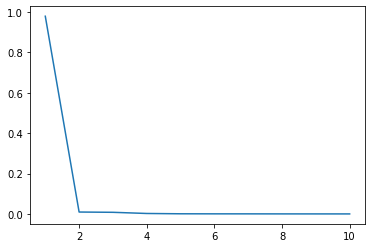

In [23]:
from sklearn.decomposition import PCA

Xtmp = data[s] # select data without the target asset
pca = PCA(n_components=10)
pca.fit(Xtmp)

n_comp = np.arange(1,11)
plt.plot(n_comp, pca.explained_variance_ratio_)



In [24]:
pca.explained_variance_ratio_

array([9.78128478e-01, 9.38139128e-03, 8.02095592e-03, 2.24453620e-03,
       7.21217763e-04, 4.60231427e-04, 3.78361584e-04, 1.91956619e-04,
       1.26322535e-04, 7.35175936e-05])

### Step 3: Parameter Selection

In [25]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from itertools import product
from scipy import stats

def compute_votes(data, pca_comp, beta, lookback, Cs, gammas, epsilons):
    '''
    compute daily votes of the models with the given parameters
    '''
    # start with equal weights
    weights = np.ones(len(Cs)*len(gammas)*len(epsilons))
    weights = weights/sum(weights) # normalize so that weights sum to 1

    daily_votes = np.zeros(len(data.index))

    for t in range(lookback,len(data.index)-1):
        predictions = []
        for C,gamma,epsilon in product(Cs,gammas,epsilons):
            model = make_pipeline(StandardScaler(), PCA(n_components=pca_comp), 
                                  SVR(C=C, gamma=gamma, epsilon=epsilon))
            X_train = data[s].iloc[t-lookback:t+1].values
            y_train = data[y].iloc[t-lookback:t+1].values.flatten()
            model.fit(X_train,y_train)
            X_test = data[s].iloc[t].values.reshape(1,-1)
            yhat = model.predict(X_test)
            predictions.append(yhat)
        # log all votes
        votes = -np.sign(data[y].iloc[t].values.flatten() - np.array(predictions)) # if price>fair, go short
        final_vote = np.dot(weights,votes)
        daily_votes[t] = final_vote   

        # update weights based on true direction
        true_direction = np.sign((data[y].iloc[t+1] - data[y].iloc[t]).values.flatten()) 
        if final_vote!=true_direction:
            incorrect_votes_ind = np.where(votes!=true_direction)[0]
            weights[incorrect_votes_ind] = beta * weights[incorrect_votes_ind]
            weights = weights/sum(weights)
            
    # further improvement: check whether the elements inside daily_votes exceed a certain amount
    for i in range(len(daily_votes)):
        if float(daily_votes[i]) < 0.3 and float(daily_votes[i]) > -0.3:
            daily_votes[i] = np.array([0.])

    return daily_votes


### Step 4: Validation Testing

In [26]:
# SVR hyperparameters
Cs = set((0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000))
gammas = set((0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000))
epsilons = set((0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1))

In [27]:
# strategy parameters
betas = [0.1,0.3,0.5,0.7] # betas for downgrading weights
lookbacks = [60] # how many last trading days to include in model training
pca_comps = [1] # number of principal components to use

In [28]:
columns = ['Beta', 'Lookback', 'PCA components', 'Num wins', 'Num losses', 'Pct Win', 
           'Avg Win', 'Avg Loss', 'Total Return', 'APR', 'Sharpe', 'Correlation with traded asset']
results = pd.DataFrame(columns=columns)

for pca_comp,beta,lookback in product(pca_comps,betas,lookbacks):
    daily_votes = compute_votes(data, pca_comp=pca_comp, beta=beta, lookback=lookback, 
                                Cs=Cs, gammas=gammas, epsilons=epsilons)
    
    datatmp = data[['RUT-SP400']].iloc[lookback+50:].copy() # skip first 50 days
    datatmp['vote'] = daily_votes[lookback+50:]
    datatmp['vote'] = datatmp['vote'].shift()
    datatmp['RUT-SP400_returns'] = datatmp['RUT-SP400'].pct_change()
    datatmp['alg_returns'] = (np.sign(datatmp['vote']) * datatmp['RUT-SP400_returns'])
    datatmp['alg_cumret'] = np.cumprod(datatmp['alg_returns']+1)
    
    datatmp.dropna(inplace=True)
    
    num_wins = (np.sign(datatmp[['RUT-SP400_returns']].values) == np.sign(datatmp[['vote']].values)).sum()
    num_losses = (np.sign(datatmp[['RUT-SP400_returns']].values) != np.sign(datatmp[['vote']].values)).sum()
    pct_win = num_wins / (num_wins + num_losses)
    avg_win = abs(datatmp[np.sign(datatmp['RUT-SP400_returns']) == np.sign(datatmp['vote'])]['RUT-SP400_returns']).sum()/num_wins
    avg_loss = abs(datatmp[np.sign(datatmp['RUT-SP400_returns']) != np.sign(datatmp['vote'])]['RUT-SP400_returns']).sum()/num_losses
    total_return = (datatmp['alg_cumret'][-1] - datatmp['alg_cumret'][0]) / datatmp['alg_cumret'][0]
    apr = (1+total_return)**(252/len(datatmp.index)) - 1
    sharpe = np.sqrt(252)*datatmp['alg_returns'].mean() / datatmp['alg_returns'].std()
    corrcoef = np.corrcoef(datatmp['RUT-SP400_returns'], datatmp['alg_returns'])[0,1]
    
    results = results.append({'Beta':beta, 'Lookback':lookback, 'PCA components':pca_comp, 
                              'Num wins':num_wins, 'Num losses':num_losses, 'Pct Win':pct_win, 
                              'Avg Win':avg_win, 'Avg Loss':avg_loss, 'Total Return':total_return, 
                              'APR':apr, 'Sharpe':sharpe, 'Correlation with traded asset':corrcoef}, 
                              ignore_index=True)
    

<ipython-input-28-6322c00232a3>:24: RuntimeWarning: invalid value encountered in double_scalars
  apr = (1+total_return)**(252/len(datatmp.index)) - 1
<ipython-input-28-6322c00232a3>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Beta':beta, 'Lookback':lookback, 'PCA components':pca_comp,
<ipython-input-28-6322c00232a3>:24: RuntimeWarning: invalid value encountered in double_scalars
  apr = (1+total_return)**(252/len(datatmp.index)) - 1
<ipython-input-28-6322c00232a3>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Beta':beta, 'Lookback':lookback, 'PCA components':pca_comp,
<ipython-input-28-6322c00232a3>:24: RuntimeWarning: invalid value encountered in double_scalars
  apr = (1+total_return)**(252/len(datatmp.index)) - 1
<ipython-input-28-6322c00232a3>

In [29]:
results

,Beta,Lookback,PCA components,Num wins,Num losses,Pct Win,Avg Win,Avg Loss,Total Return,APR,Sharpe,Correlation with traded asset
0,0.1,60.0,1.0,165.0,204.0,0.447154,0.045310,0.044004,-8.054877,NaN,-0.087642,-0.727177
1,0.3,60.0,1.0,162.0,207.0,0.439024,0.045396,0.043955,-7.589607,NaN,-0.107156,-0.726521
2,0.5,60.0,1.0,166.0,203.0,0.449864,0.043702,0.045312,-8.016946,NaN,-0.094008,-0.725585
3,0.7,60.0,1.0,172.0,197.0,0.466125,0.038598,0.049817,0.705289,0.439796,0.915496,0.086941


In [52]:
# strategy parameters
betas = [0.69] # betas for downgrading weights
lookbacks = [60] # how many last trading days to include in model training
pca_comps = [1] # number of principal components to use

In [53]:
columns = ['Beta', 'Lookback', 'PCA components', 'Num wins', 'Num losses', 'Pct Win', 
           'Avg Win', 'Avg Loss', 'Total Return', 'APR', 'Sharpe', 'Correlation with traded asset']
results = pd.DataFrame(columns=columns)

for pca_comp,beta,lookback in product(pca_comps,betas,lookbacks):
    daily_votes = compute_votes(data, pca_comp=pca_comp, beta=beta, lookback=lookback, 
                                Cs=Cs, gammas=gammas, epsilons=epsilons)
    
    datatmp = data[['RUT-SP400']].iloc[lookback+50:].copy() # skip first 50 days
    datatmp['vote'] = daily_votes[lookback+50:]
    datatmp['vote'] = datatmp['vote'].shift()
    datatmp['RUT-SP400_returns'] = datatmp['RUT-SP400'].pct_change()
    datatmp['alg_returns'] = (np.sign(datatmp['vote']) * datatmp['RUT-SP400_returns'])
    datatmp['alg_cumret'] = np.cumprod(datatmp['alg_returns']+1)
    
    datatmp.dropna(inplace=True)
    
    num_wins = (np.sign(datatmp[['RUT-SP400_returns']].values) == np.sign(datatmp[['vote']].values)).sum()
    num_losses = (np.sign(datatmp[['RUT-SP400_returns']].values) != np.sign(datatmp[['vote']].values)).sum()
    pct_win = num_wins / (num_wins + num_losses)
    avg_win = abs(datatmp[np.sign(datatmp['RUT-SP400_returns']) == np.sign(datatmp['vote'])]['RUT-SP400_returns']).sum()/num_wins
    avg_loss = abs(datatmp[np.sign(datatmp['RUT-SP400_returns']) != np.sign(datatmp['vote'])]['RUT-SP400_returns']).sum()/num_losses
    total_return = (datatmp['alg_cumret'][-1] - datatmp['alg_cumret'][0]) / datatmp['alg_cumret'][0]
    apr = (1+total_return)**(252/len(datatmp.index)) - 1
    sharpe = np.sqrt(252)*datatmp['alg_returns'].mean() / datatmp['alg_returns'].std()
    corrcoef = np.corrcoef(datatmp['RUT-SP400_returns'], datatmp['alg_returns'])[0,1]
    
    results = results.append({'Beta':beta, 'Lookback':lookback, 'PCA components':pca_comp, 
                              'Num wins':num_wins, 'Num losses':num_losses, 'Pct Win':pct_win, 
                              'Avg Win':avg_win, 'Avg Loss':avg_loss, 'Total Return':total_return, 
                              'APR':apr, 'Sharpe':sharpe, 'Correlation with traded asset':corrcoef}, 
                              ignore_index=True)

<ipython-input-53-7f6f1447cfa3>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Beta':beta, 'Lookback':lookback, 'PCA components':pca_comp,


In [54]:
results

,Beta,Lookback,PCA components,Num wins,Num losses,Pct Win,Avg Win,Avg Loss,Total Return,APR,Sharpe,Correlation with traded asset
0,0.69,60.0,1.0,173.0,196.0,0.468835,0.038993,0.049526,0.887701,0.543271,0.967187,0.084706


In [60]:
# strategy parameters
betas = [0.67] # betas for downgrading weights
lookbacks = [60] # how many last trading days to include in model training
pca_comps = [1] # number of principal components to use

In [61]:
columns = ['Beta', 'Lookback', 'PCA components', 'Num wins', 'Num losses', 'Pct Win', 
           'Avg Win', 'Avg Loss', 'Total Return', 'APR', 'Sharpe', 'Correlation with traded asset']
results = pd.DataFrame(columns=columns)

for pca_comp,beta,lookback in product(pca_comps,betas,lookbacks):
    daily_votes = compute_votes(data, pca_comp=pca_comp, beta=beta, lookback=lookback, 
                                Cs=Cs, gammas=gammas, epsilons=epsilons)
    
    datatmp = data[['RUT-SP400']].iloc[lookback+50:].copy() # skip first 50 days
    datatmp['vote'] = daily_votes[lookback+50:]
    datatmp['vote'] = datatmp['vote'].shift()
    datatmp['RUT-SP400_returns'] = datatmp['RUT-SP400'].pct_change()
    datatmp['alg_returns'] = (np.sign(datatmp['vote']) * datatmp['RUT-SP400_returns'])
    datatmp['alg_cumret'] = np.cumprod(datatmp['alg_returns']+1)
    
    datatmp.dropna(inplace=True)
    
    num_wins = (np.sign(datatmp[['RUT-SP400_returns']].values) == np.sign(datatmp[['vote']].values)).sum()
    num_losses = (np.sign(datatmp[['RUT-SP400_returns']].values) != np.sign(datatmp[['vote']].values)).sum()
    pct_win = num_wins / (num_wins + num_losses)
    avg_win = abs(datatmp[np.sign(datatmp['RUT-SP400_returns']) == np.sign(datatmp['vote'])]['RUT-SP400_returns']).sum()/num_wins
    avg_loss = abs(datatmp[np.sign(datatmp['RUT-SP400_returns']) != np.sign(datatmp['vote'])]['RUT-SP400_returns']).sum()/num_losses
    total_return = (datatmp['alg_cumret'][-1] - datatmp['alg_cumret'][0]) / datatmp['alg_cumret'][0]
    apr = (1+total_return)**(252/len(datatmp.index)) - 1
    sharpe = np.sqrt(252)*datatmp['alg_returns'].mean() / datatmp['alg_returns'].std()
    corrcoef = np.corrcoef(datatmp['RUT-SP400_returns'], datatmp['alg_returns'])[0,1]
    
    results = results.append({'Beta':beta, 'Lookback':lookback, 'PCA components':pca_comp, 
                              'Num wins':num_wins, 'Num losses':num_losses, 'Pct Win':pct_win, 
                              'Avg Win':avg_win, 'Avg Loss':avg_loss, 'Total Return':total_return, 
                              'APR':apr, 'Sharpe':sharpe, 'Correlation with traded asset':corrcoef}, 
                              ignore_index=True)

<ipython-input-61-7f6f1447cfa3>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Beta':beta, 'Lookback':lookback, 'PCA components':pca_comp,


In [62]:
results

,Beta,Lookback,PCA components,Num wins,Num losses,Pct Win,Avg Win,Avg Loss,Total Return,APR,Sharpe,Correlation with traded asset
0,0.67,60.0,1.0,174.0,195.0,0.471545,0.039292,0.049313,1.091886,0.655404,1.019091,0.083038


In [56]:
# strategy parameters
betas = [0.68] # betas for downgrading weights
lookbacks = [60] # how many last trading days to include in model training
pca_comps = [1] # number of principal components to use

In [57]:
columns = ['Beta', 'Lookback', 'PCA components', 'Num wins', 'Num losses', 'Pct Win', 
           'Avg Win', 'Avg Loss', 'Total Return', 'APR', 'Sharpe', 'Correlation with traded asset']
results = pd.DataFrame(columns=columns)

for pca_comp,beta,lookback in product(pca_comps,betas,lookbacks):
    daily_votes = compute_votes(data, pca_comp=pca_comp, beta=beta, lookback=lookback, 
                                Cs=Cs, gammas=gammas, epsilons=epsilons)
    
    datatmp = data[['RUT-SP400']].iloc[lookback+50:].copy() # skip first 50 days
    datatmp['vote'] = daily_votes[lookback+50:]
    datatmp['vote'] = datatmp['vote'].shift()
    datatmp['RUT-SP400_returns'] = datatmp['RUT-SP400'].pct_change()
    datatmp['alg_returns'] = (np.sign(datatmp['vote']) * datatmp['RUT-SP400_returns'])
    datatmp['alg_cumret'] = np.cumprod(datatmp['alg_returns']+1)
    
    datatmp.dropna(inplace=True)
    
    num_wins = (np.sign(datatmp[['RUT-SP400_returns']].values) == np.sign(datatmp[['vote']].values)).sum()
    num_losses = (np.sign(datatmp[['RUT-SP400_returns']].values) != np.sign(datatmp[['vote']].values)).sum()
    pct_win = num_wins / (num_wins + num_losses)
    avg_win = abs(datatmp[np.sign(datatmp['RUT-SP400_returns']) == np.sign(datatmp['vote'])]['RUT-SP400_returns']).sum()/num_wins
    avg_loss = abs(datatmp[np.sign(datatmp['RUT-SP400_returns']) != np.sign(datatmp['vote'])]['RUT-SP400_returns']).sum()/num_losses
    total_return = (datatmp['alg_cumret'][-1] - datatmp['alg_cumret'][0]) / datatmp['alg_cumret'][0]
    apr = (1+total_return)**(252/len(datatmp.index)) - 1
    sharpe = np.sqrt(252)*datatmp['alg_returns'].mean() / datatmp['alg_returns'].std()
    corrcoef = np.corrcoef(datatmp['RUT-SP400_returns'], datatmp['alg_returns'])[0,1]
    
    results = results.append({'Beta':beta, 'Lookback':lookback, 'PCA components':pca_comp, 
                              'Num wins':num_wins, 'Num losses':num_losses, 'Pct Win':pct_win, 
                              'Avg Win':avg_win, 'Avg Loss':avg_loss, 'Total Return':total_return, 
                              'APR':apr, 'Sharpe':sharpe, 'Correlation with traded asset':corrcoef}, 
                              ignore_index=True)

<ipython-input-57-7f6f1447cfa3>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Beta':beta, 'Lookback':lookback, 'PCA components':pca_comp,


In [58]:
results

,Beta,Lookback,PCA components,Num wins,Num losses,Pct Win,Avg Win,Avg Loss,Total Return,APR,Sharpe,Correlation with traded asset
0,0.68,60.0,1.0,174.0,195.0,0.471545,0.039292,0.049313,1.059454,0.637833,1.011281,0.083086


In [49]:
results

,Beta,Lookback,PCA components,Num wins,Num losses,Pct Win,Avg Win,Avg Loss,Total Return,APR,Sharpe,Correlation with traded asset
0,0.71,60.0,1.0,171.0,198.0,0.463415,0.03882,0.049569,0.704114,0.439119,0.91515,0.086942


In [45]:
results

,Beta,Lookback,PCA components,Num wins,Num losses,Pct Win,Avg Win,Avg Loss,Total Return,APR,Sharpe,Correlation with traded asset
0,0.65,60.0,1.0,174.0,195.0,0.471545,0.041715,0.047151,-7.033627,NaN,-0.130219,-0.721785
1,0.75,60.0,1.0,163.0,206.0,0.441734,0.038391,0.049491,0.176500,0.117401,0.723427,0.101599


In [36]:
results

,Beta,Lookback,PCA components,Num wins,Num losses,Pct Win,Avg Win,Avg Loss,Total Return,APR,Sharpe,Correlation with traded asset
0,0.7,20.0,1.0,179.0,230.0,0.437653,0.049350,0.034880,-0.722194,-0.545778,0.432392,0.759780
1,0.7,40.0,1.0,142.0,247.0,0.365039,0.027968,0.051527,-0.906144,-0.784054,-0.706038,0.054901
2,0.7,60.0,1.0,172.0,197.0,0.466125,0.038598,0.049817,0.705289,0.439796,0.915496,0.086941
3,0.7,80.0,1.0,158.0,191.0,0.452722,0.038234,0.053586,-0.543111,-0.431982,0.617816,0.265292
4,0.7,20.0,2.0,160.0,249.0,0.391198,0.035263,0.045036,-1.044182,NaN,-0.974927,-0.569373
5,0.7,40.0,2.0,160.0,229.0,0.411311,0.050398,0.037707,-0.746619,-0.589081,0.391867,0.844687
6,0.7,60.0,2.0,145.0,224.0,0.392954,0.033290,0.051901,-2.465449,NaN,-0.647920,-0.906145
7,0.7,80.0,2.0,154.0,195.0,0.441261,0.036841,0.054371,-1.041816,NaN,-1.057648,-0.640296


In [72]:
# strategy parameters
betas = [0.72] # betas for downgrading weights
lookbacks = [60] # how many last trading days to include in model training
pca_comps = [1] # number of principal components to use

In [73]:
columns = ['Beta', 'Lookback', 'PCA components', 'Num wins', 'Num losses', 'Pct Win', 
           'Avg Win', 'Avg Loss', 'Total Return', 'APR', 'Sharpe', 'Correlation with traded asset']
results = pd.DataFrame(columns=columns)

for pca_comp,beta,lookback in product(pca_comps,betas,lookbacks):
    daily_votes = compute_votes(data, pca_comp=pca_comp, beta=beta, lookback=lookback, 
                                Cs=Cs, gammas=gammas, epsilons=epsilons)
    
    datatmp = data[['RUT-SP400']].iloc[lookback+50:].copy() # skip first 50 days
    datatmp['vote'] = daily_votes[lookback+50:]
    datatmp['vote'] = datatmp['vote'].shift()
    datatmp['RUT-SP400_returns'] = datatmp['RUT-SP400'].pct_change()
    datatmp['alg_returns'] = (np.sign(datatmp['vote']) * datatmp['RUT-SP400_returns'])
    datatmp['alg_cumret'] = np.cumprod(datatmp['alg_returns']+1)
    
    datatmp.dropna(inplace=True)
    
    num_wins = (np.sign(datatmp[['RUT-SP400_returns']].values) == np.sign(datatmp[['vote']].values)).sum()
    num_losses = (np.sign(datatmp[['RUT-SP400_returns']].values) != np.sign(datatmp[['vote']].values)).sum()
    pct_win = num_wins / (num_wins + num_losses)
    avg_win = abs(datatmp[np.sign(datatmp['RUT-SP400_returns']) == np.sign(datatmp['vote'])]['RUT-SP400_returns']).sum()/num_wins
    avg_loss = abs(datatmp[np.sign(datatmp['RUT-SP400_returns']) != np.sign(datatmp['vote'])]['RUT-SP400_returns']).sum()/num_losses
    total_return = (datatmp['alg_cumret'][-1] - datatmp['alg_cumret'][0]) / datatmp['alg_cumret'][0]
    apr = (1+total_return)**(252/len(datatmp.index)) - 1
    sharpe = np.sqrt(252)*datatmp['alg_returns'].mean() / datatmp['alg_returns'].std()
    corrcoef = np.corrcoef(datatmp['RUT-SP400_returns'], datatmp['alg_returns'])[0,1]
    
    results = results.append({'Beta':beta, 'Lookback':lookback, 'PCA components':pca_comp, 
                              'Num wins':num_wins, 'Num losses':num_losses, 'Pct Win':pct_win, 
                              'Avg Win':avg_win, 'Avg Loss':avg_loss, 'Total Return':total_return, 
                              'APR':apr, 'Sharpe':sharpe, 'Correlation with traded asset':corrcoef}, 
                              ignore_index=True)

<ipython-input-73-7f6f1447cfa3>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Beta':beta, 'Lookback':lookback, 'PCA components':pca_comp,


In [74]:
results

,Beta,Lookback,PCA components,Num wins,Num losses,Pct Win,Avg Win,Avg Loss,Total Return,APR,Sharpe,Correlation with traded asset
0,0.72,60.0,1.0,169.0,200.0,0.457995,0.037584,0.050505,0.275303,0.180664,0.764652,0.101059


### Step 5: Visual Performance: BackTest

In [75]:
daily_votes = compute_votes(data, pca_comp=1, beta=0.67, lookback=60, 
                            Cs=Cs, gammas=gammas, epsilons=epsilons)
    
datatmp = data[['RUT-SP400']].iloc[lookback+50:].copy() # skip first 50 days
datatmp['vote'] = daily_votes[lookback+50:]
datatmp['vote'] = datatmp['vote'].shift()
datatmp['RUT-SP400_returns'] = datatmp['RUT-SP400'].pct_change()
datatmp['alg_returns'] = (np.sign(datatmp['vote']) * datatmp['RUT-SP400_returns'])
datatmp['alg_cumret'] = np.cumprod(datatmp['alg_returns']+1)
datatmp.dropna(inplace=True)

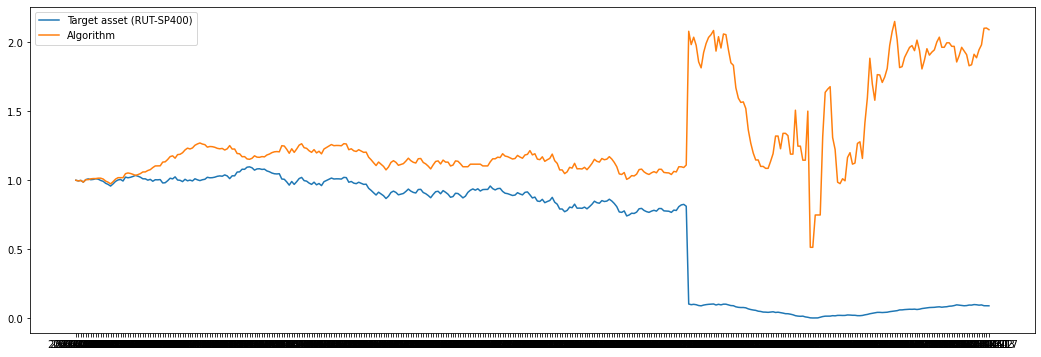

In [69]:
plt.figure(figsize=(18,6))
plt.plot(datatmp[['RUT-SP400']]/datatmp[['RUT-SP400']].iloc[0], label='Target asset (RUT-SP400)')
plt.plot(datatmp[['alg_cumret']]/datatmp[['alg_cumret']].iloc[0], label='Algorithm')
plt.legend()

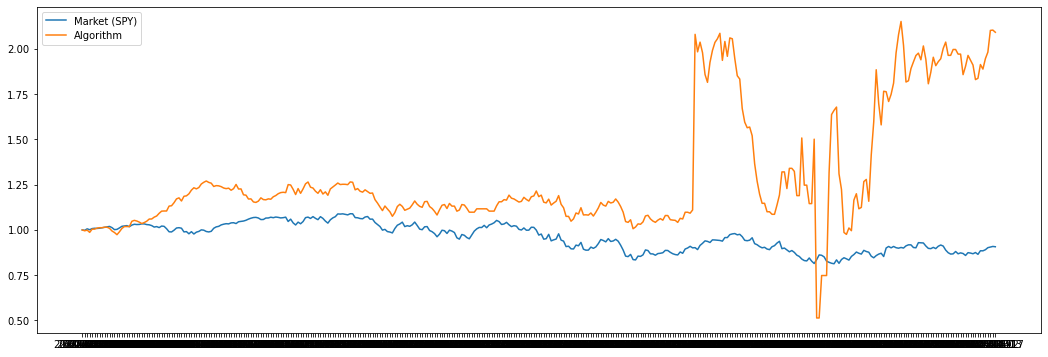

In [70]:
datatmp['SPY'] = data.loc[datatmp.index, ['SPY']]

plt.figure(figsize=(18,6))
plt.plot(datatmp[['SPY']]/datatmp[['SPY']].iloc[0], label='Market (SPY)')
plt.plot(datatmp[['alg_cumret']]/datatmp[['alg_cumret']].iloc[0], label='Algorithm')
plt.legend()

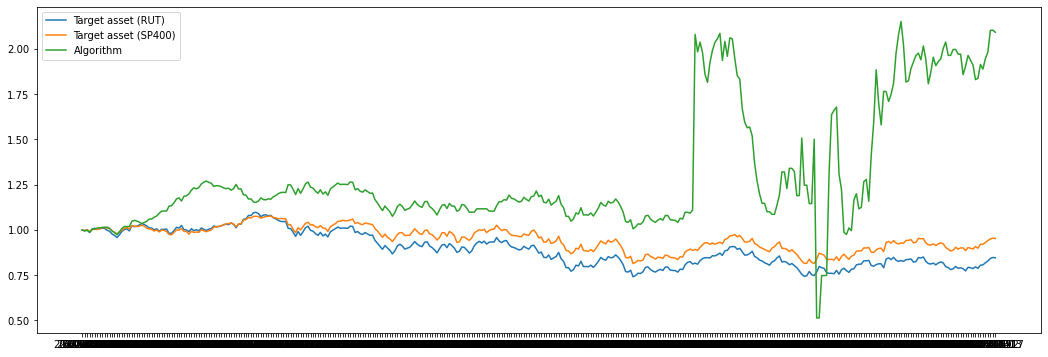

In [77]:
plt.figure(figsize=(18,6))
datatmp['RUT'] = data[['RUT']].iloc[lookback+50:].copy() # skip first 50 days
datatmp['SP400'] = data[['SP400']].iloc[lookback+50:].copy() # skip first 50 days
plt.plot(datatmp[['RUT']]/datatmp[['RUT']].iloc[0], label='Target asset (RUT)')
plt.plot(datatmp[['SP400']]/datatmp[['SP400']].iloc[0], label='Target asset (SP400)')
plt.plot(datatmp[['alg_cumret']]/datatmp[['alg_cumret']].iloc[0], label='Algorithm')
plt.legend()

In [79]:
daily_votes = compute_votes(data, pca_comp=1, beta=0.68, lookback=60, 
                            Cs=Cs, gammas=gammas, epsilons=epsilons)
    
datatmp = data[['RUT-SP400']].iloc[lookback+50:].copy() # skip first 50 days
datatmp['vote'] = daily_votes[lookback+50:]
datatmp['vote'] = datatmp['vote'].shift()
datatmp['RUT-SP400_returns'] = datatmp['RUT-SP400'].pct_change()
datatmp['alg_returns'] = (np.sign(datatmp['vote']) * datatmp['RUT-SP400_returns'])
datatmp['alg_cumret'] = np.cumprod(datatmp['alg_returns']+1)
datatmp.dropna(inplace=True)

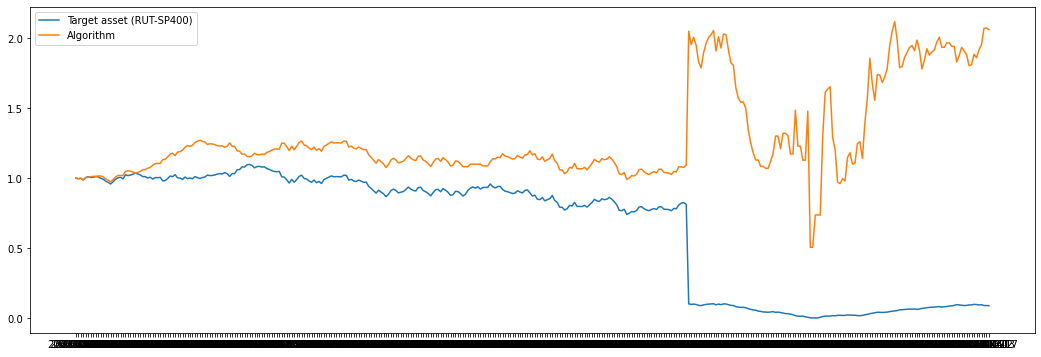

In [80]:
plt.figure(figsize=(18,6))
plt.plot(datatmp[['RUT-SP400']]/datatmp[['RUT-SP400']].iloc[0], label='Target asset (RUT-SP400)')
plt.plot(datatmp[['alg_cumret']]/datatmp[['alg_cumret']].iloc[0], label='Algorithm')
plt.legend()

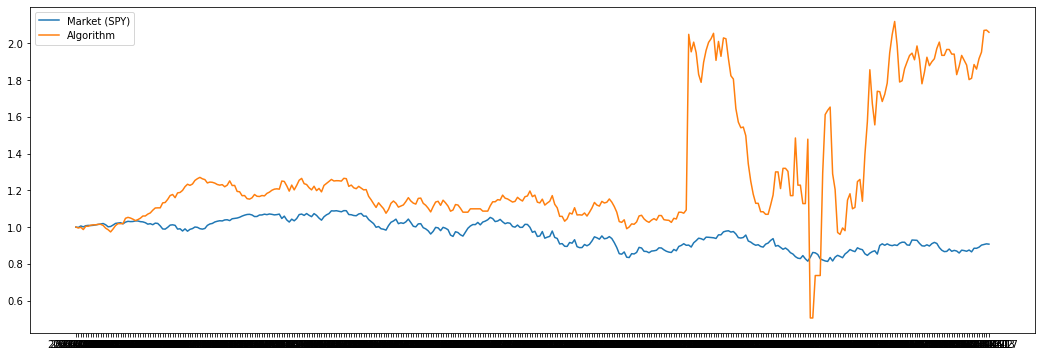

In [81]:
datatmp['SPY'] = data.loc[datatmp.index, ['SPY']]

plt.figure(figsize=(18,6))
plt.plot(datatmp[['SPY']]/datatmp[['SPY']].iloc[0], label='Market (SPY)')
plt.plot(datatmp[['alg_cumret']]/datatmp[['alg_cumret']].iloc[0], label='Algorithm')
plt.legend()

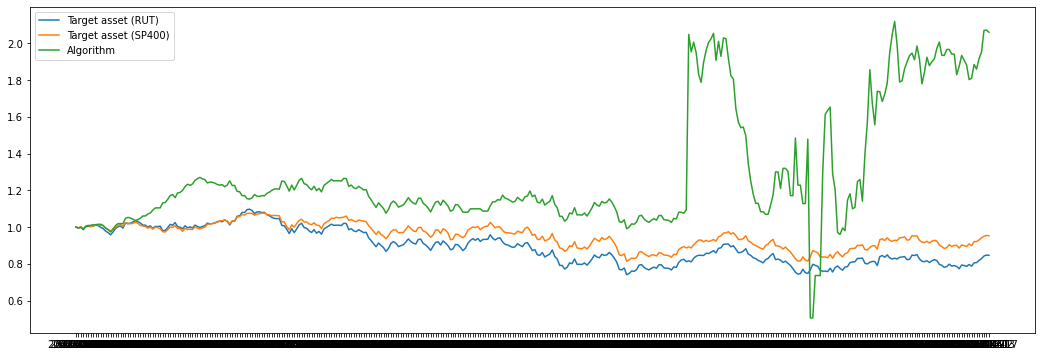

In [82]:
plt.figure(figsize=(18,6))
datatmp['RUT'] = data[['RUT']].iloc[lookback+50:].copy() # skip first 50 days
datatmp['SP400'] = data[['SP400']].iloc[lookback+50:].copy() # skip first 50 days
plt.plot(datatmp[['RUT']]/datatmp[['RUT']].iloc[0], label='Target asset (RUT)')
plt.plot(datatmp[['SP400']]/datatmp[['SP400']].iloc[0], label='Target asset (SP400)')
plt.plot(datatmp[['alg_cumret']]/datatmp[['alg_cumret']].iloc[0], label='Algorithm')
plt.legend()

In [83]:
daily_votes = compute_votes(data, pca_comp=1, beta=0.69, lookback=60, 
                            Cs=Cs, gammas=gammas, epsilons=epsilons)
    
datatmp = data[['RUT-SP400']].iloc[lookback+50:].copy() # skip first 50 days
datatmp['vote'] = daily_votes[lookback+50:]
datatmp['vote'] = datatmp['vote'].shift()
datatmp['RUT-SP400_returns'] = datatmp['RUT-SP400'].pct_change()
datatmp['alg_returns'] = (np.sign(datatmp['vote']) * datatmp['RUT-SP400_returns'])
datatmp['alg_cumret'] = np.cumprod(datatmp['alg_returns']+1)
datatmp.dropna(inplace=True)

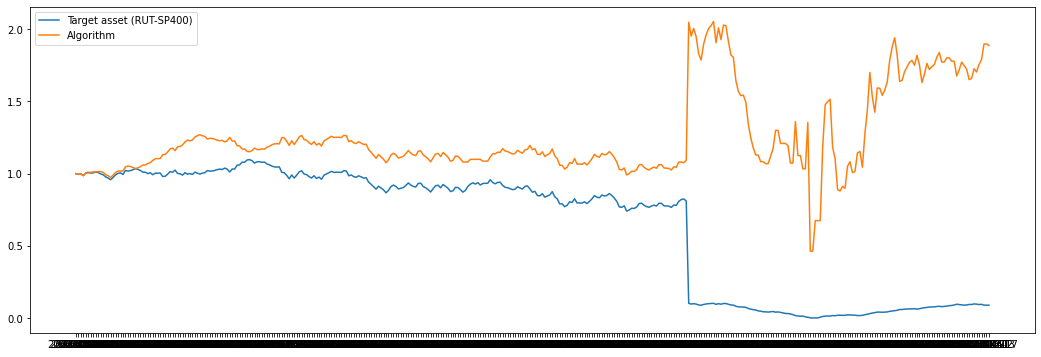

In [84]:
plt.figure(figsize=(18,6))
plt.plot(datatmp[['RUT-SP400']]/datatmp[['RUT-SP400']].iloc[0], label='Target asset (RUT-SP400)')
plt.plot(datatmp[['alg_cumret']]/datatmp[['alg_cumret']].iloc[0], label='Algorithm')
plt.legend()

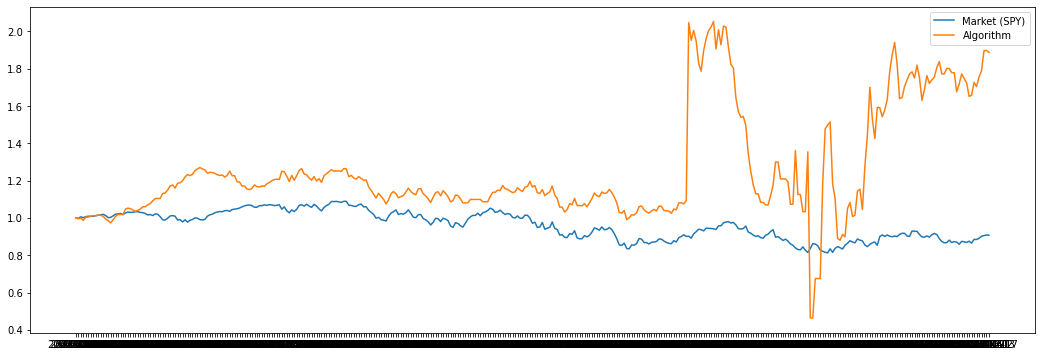

In [85]:
datatmp['SPY'] = data.loc[datatmp.index, ['SPY']]

plt.figure(figsize=(18,6))
plt.plot(datatmp[['SPY']]/datatmp[['SPY']].iloc[0], label='Market (SPY)')
plt.plot(datatmp[['alg_cumret']]/datatmp[['alg_cumret']].iloc[0], label='Algorithm')
plt.legend()

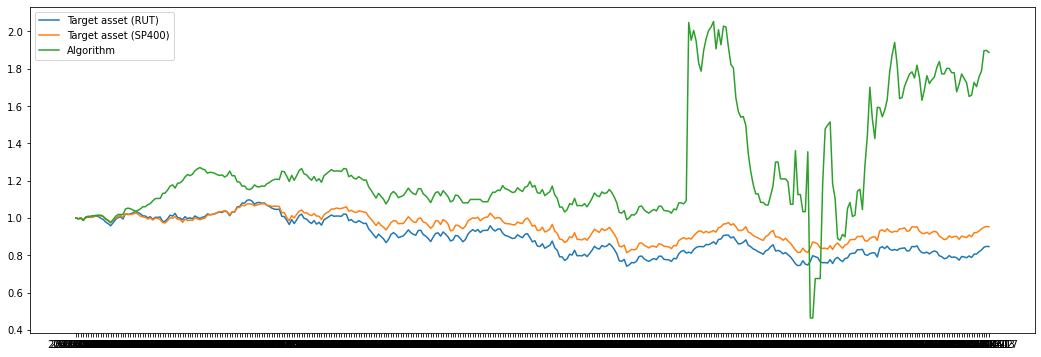

In [86]:
plt.figure(figsize=(18,6))
datatmp['RUT'] = data[['RUT']].iloc[lookback+50:].copy() # skip first 50 days
datatmp['SP400'] = data[['SP400']].iloc[lookback+50:].copy() # skip first 50 days
plt.plot(datatmp[['RUT']]/datatmp[['RUT']].iloc[0], label='Target asset (RUT)')
plt.plot(datatmp[['SP400']]/datatmp[['SP400']].iloc[0], label='Target asset (SP400)')
plt.plot(datatmp[['alg_cumret']]/datatmp[['alg_cumret']].iloc[0], label='Algorithm')
plt.legend()

In [87]:
daily_votes = compute_votes(data, pca_comp=1, beta=0.70, lookback=60, 
                            Cs=Cs, gammas=gammas, epsilons=epsilons)
    
datatmp = data[['RUT-SP400']].iloc[lookback+50:].copy() # skip first 50 days
datatmp['vote'] = daily_votes[lookback+50:]
datatmp['vote'] = datatmp['vote'].shift()
datatmp['RUT-SP400_returns'] = datatmp['RUT-SP400'].pct_change()
datatmp['alg_returns'] = (np.sign(datatmp['vote']) * datatmp['RUT-SP400_returns'])
datatmp['alg_cumret'] = np.cumprod(datatmp['alg_returns']+1)
datatmp.dropna(inplace=True)

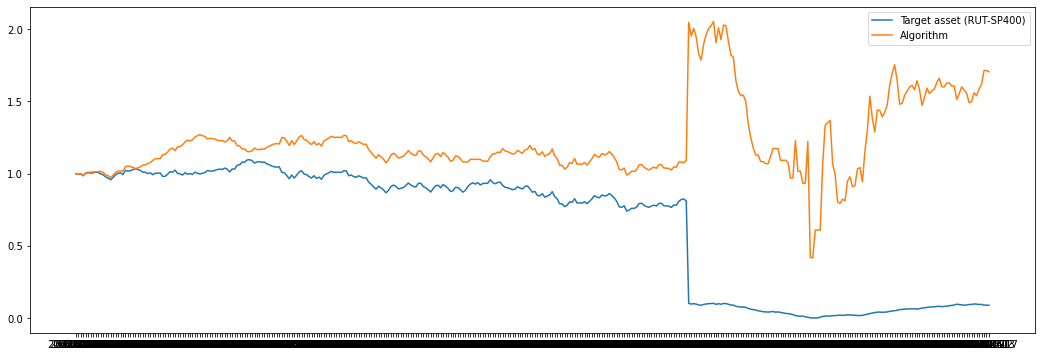

In [88]:
plt.figure(figsize=(18,6))
plt.plot(datatmp[['RUT-SP400']]/datatmp[['RUT-SP400']].iloc[0], label='Target asset (RUT-SP400)')
plt.plot(datatmp[['alg_cumret']]/datatmp[['alg_cumret']].iloc[0], label='Algorithm')
plt.legend()

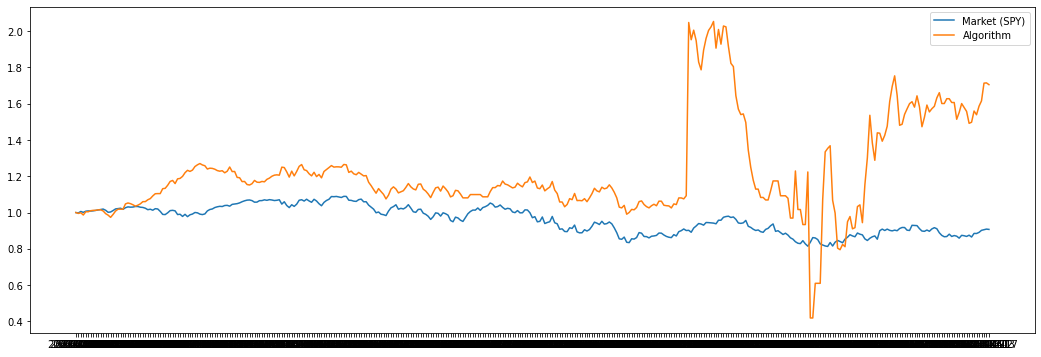

In [89]:
datatmp['SPY'] = data.loc[datatmp.index, ['SPY']]

plt.figure(figsize=(18,6))
plt.plot(datatmp[['SPY']]/datatmp[['SPY']].iloc[0], label='Market (SPY)')
plt.plot(datatmp[['alg_cumret']]/datatmp[['alg_cumret']].iloc[0], label='Algorithm')
plt.legend()

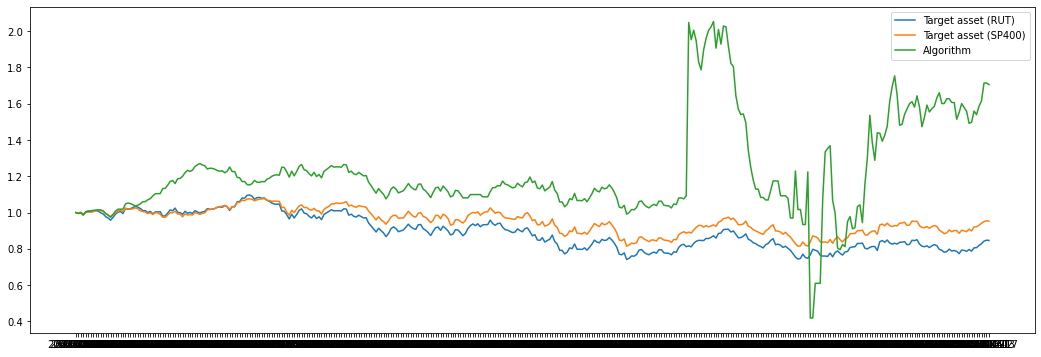

In [90]:
plt.figure(figsize=(18,6))
datatmp['RUT'] = data[['RUT']].iloc[lookback+50:].copy() # skip first 50 days
datatmp['SP400'] = data[['SP400']].iloc[lookback+50:].copy() # skip first 50 days
plt.plot(datatmp[['RUT']]/datatmp[['RUT']].iloc[0], label='Target asset (RUT)')
plt.plot(datatmp[['SP400']]/datatmp[['SP400']].iloc[0], label='Target asset (SP400)')
plt.plot(datatmp[['alg_cumret']]/datatmp[['alg_cumret']].iloc[0], label='Algorithm')
plt.legend()

In [91]:
daily_votes = compute_votes(data, pca_comp=1, beta=0.71, lookback=60, 
                            Cs=Cs, gammas=gammas, epsilons=epsilons)
    
datatmp = data[['RUT-SP400']].iloc[lookback+50:].copy() # skip first 50 days
datatmp['vote'] = daily_votes[lookback+50:]
datatmp['vote'] = datatmp['vote'].shift()
datatmp['RUT-SP400_returns'] = datatmp['RUT-SP400'].pct_change()
datatmp['alg_returns'] = (np.sign(datatmp['vote']) * datatmp['RUT-SP400_returns'])
datatmp['alg_cumret'] = np.cumprod(datatmp['alg_returns']+1)
datatmp.dropna(inplace=True)

In [110]:
datatmp

,RUT-SP400,vote,RUT-SP400_returns,alg_returns,alg_cumret,RUT,SP400,SPY
Date,,,,,,,,
2021-07-30,0.988974,0.000000,-0.006152,-0.000000,1.000000,0.988974,1.069904,1.133013
2021-08-02,0.984199,0.435871,-0.004829,-0.004829,0.995171,0.984199,1.065290,1.130636
2021-08-03,0.987788,0.684371,0.003647,0.003647,0.998801,0.987788,1.071966,1.139834
2021-08-04,0.975678,0.499495,-0.012260,-0.012260,0.986556,0.975678,1.061056,1.134227
2021-08-05,0.993310,0.471337,0.018071,0.018071,1.004384,0.993310,1.070894,1.141410
...,...,...,...,...,...,...,...,...
2023-01-10,0.093089,-0.959523,-0.030515,0.030515,1.945974,0.809682,0.995053,1.009172
2023-01-11,0.094822,0.387851,0.018609,0.018609,1.982188,0.819188,1.007258,1.021936
2023-01-12,0.089088,-0.999753,-0.060471,0.060471,2.102053,0.833408,1.016363,1.025657


In [111]:
datatmp['RUT_cumret'] = datatmp[['RUT']]/datatmp[['RUT']].iloc[0]
datatmp['SP400_cumret] = datatmp[['SP400']]/datatmp[['SP400']].iloc[0]

In [112]:
datatmp['SPY_returns'] = datatmp[['SPY']]/datatmp[['SPY']].iloc[0]
datatmp['alg_cumret'] = datatmp[['alg_cumret']]/datatmp[['alg_cumret']].iloc[0]

In [118]:
datatmp = datatmp.rename(columns = {'alg_cumret': 'SVM'})

<AxesSubplot: title={'center': 'Cumulative Return'}, xlabel='Date'>

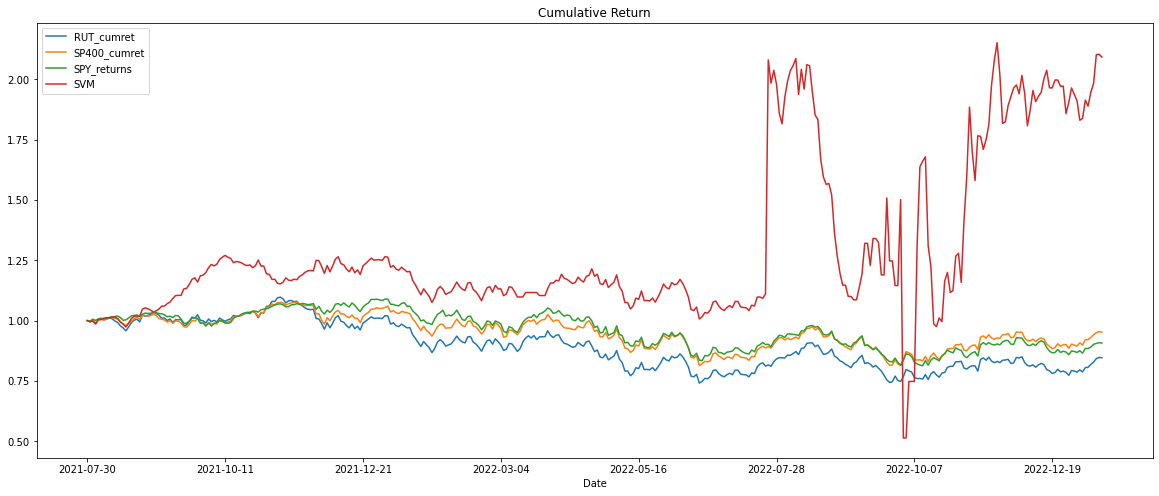

In [120]:
datatmp[['RUT_cumret', 'SP400_cumret', 'SPY_returns', 'SVM']].dropna().plot(figsize=(20,8), title = 'Cumulative Return')

<AxesSubplot: xlabel='Date'>

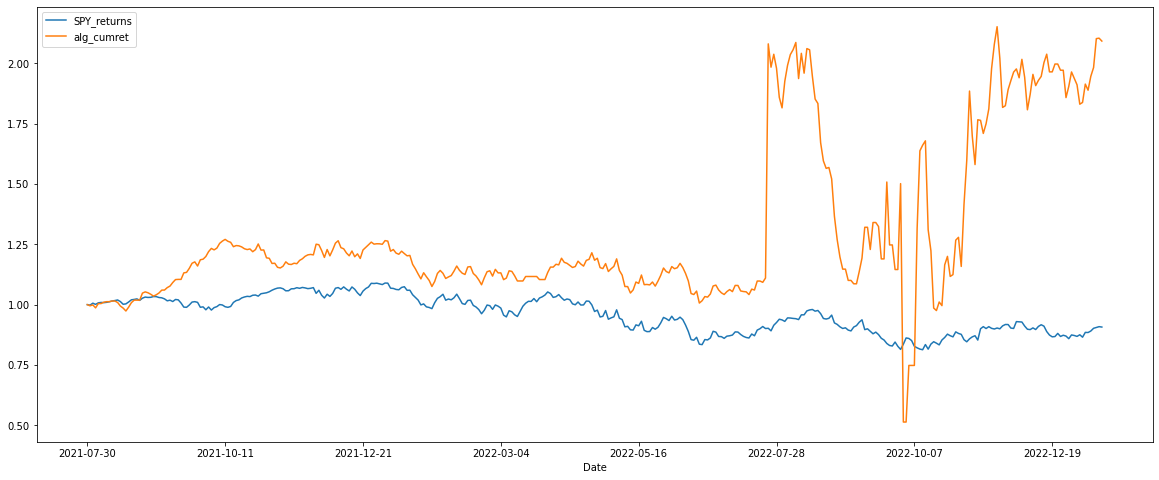

In [114]:
datatmp[['SPY_returns','alg_cumret']].dropna().plot(figsize=(20,8))

In [115]:
datatmp['RUT-SP400_cumret'] = datatmp[['RUT-SP400']]/datatmp[['RUT-SP400']].iloc[0]

<AxesSubplot: xlabel='Date'>

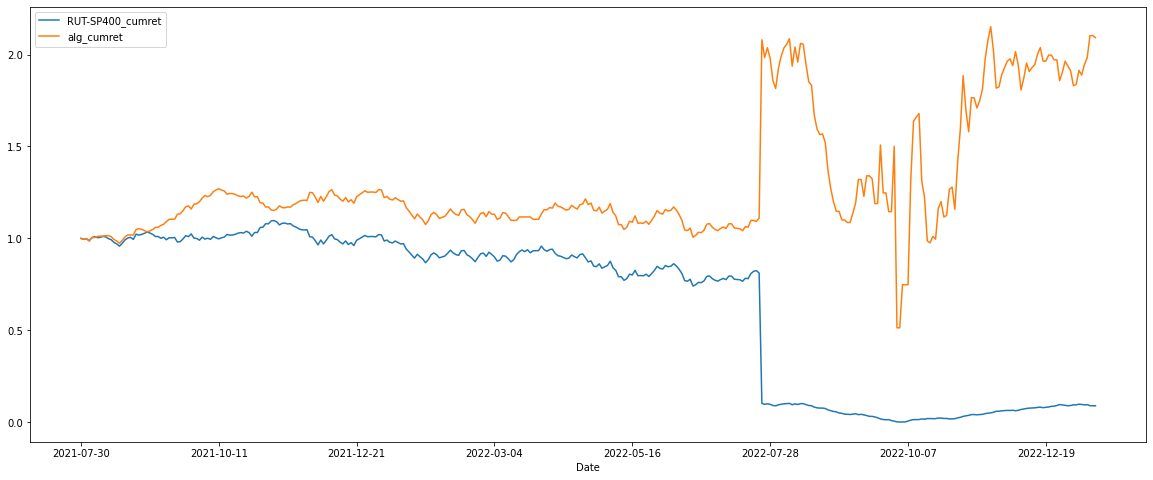

In [116]:
datatmp[['RUT-SP400_cumret', 'alg_cumret']].dropna().plot(figsize=(20,8))

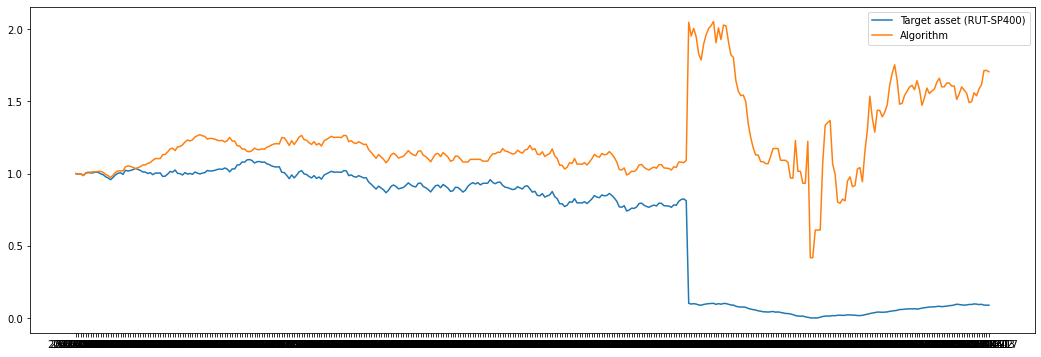

In [92]:
plt.figure(figsize=(18,6))
plt.plot(datatmp[['RUT-SP400']]/datatmp[['RUT-SP400']].iloc[0], label='Target asset (RUT-SP400)')
plt.plot(datatmp[['alg_cumret']]/datatmp[['alg_cumret']].iloc[0], label='Algorithm')
plt.legend()

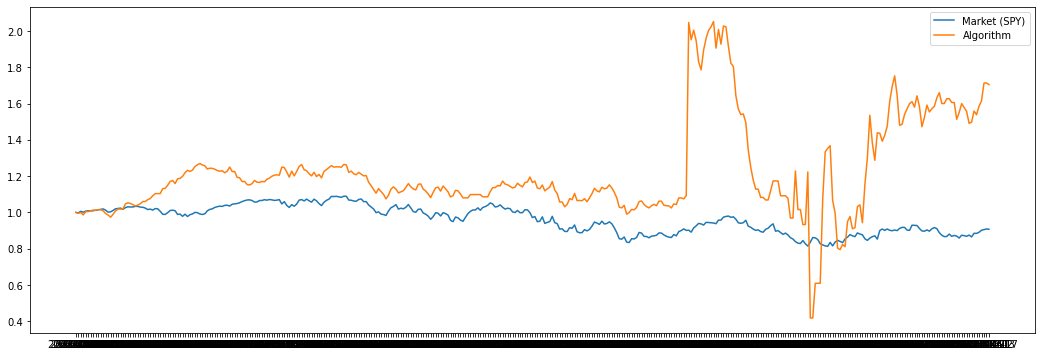

In [93]:
datatmp['SPY'] = data.loc[datatmp.index, ['SPY']]

plt.figure(figsize=(18,6))
plt.plot(datatmp[['SPY']]/datatmp[['SPY']].iloc[0], label='Market (SPY)')
plt.plot(datatmp[['alg_cumret']]/datatmp[['alg_cumret']].iloc[0], label='Algorithm')
plt.legend()

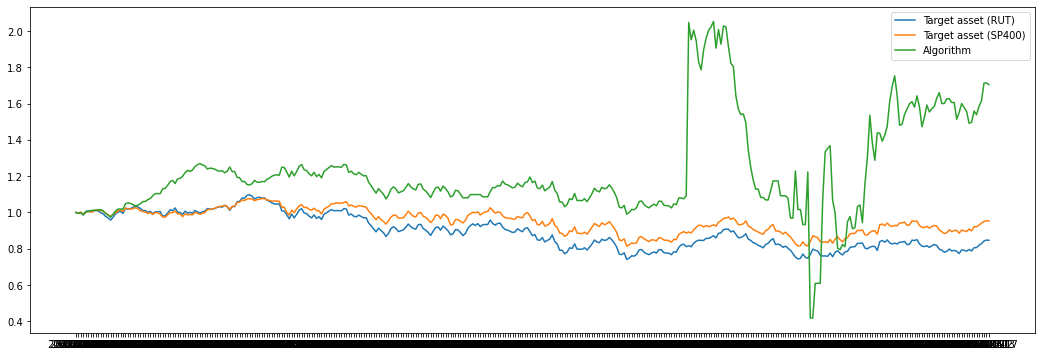

In [94]:
plt.figure(figsize=(18,6))
datatmp['RUT'] = data[['RUT']].iloc[lookback+50:].copy() # skip first 50 days
datatmp['SP400'] = data[['SP400']].iloc[lookback+50:].copy() # skip first 50 days
plt.plot(datatmp[['RUT']]/datatmp[['RUT']].iloc[0], label='Target asset (RUT)')
plt.plot(datatmp[['SP400']]/datatmp[['SP400']].iloc[0], label='Target asset (SP400)')
plt.plot(datatmp[['alg_cumret']]/datatmp[['alg_cumret']].iloc[0], label='Algorithm')
plt.legend()

### Step 6: Correlation Check

In [78]:
def calculate_metrics(cumret):
    '''
    calculate performance metrics from cumulative returns
    '''
    total_return = (cumret[-1] - cumret[0])/cumret[0]
    apr = (1+total_return)**(252/len(cumret)) - 1
    sharpe = np.sqrt(252) * np.nanmean(cumret.pct_change()) / np.nanstd(cumret.pct_change())
    
    # maxdd and maxddd
    highwatermark=np.zeros(cumret.shape)
    drawdown=np.zeros(cumret.shape)
    drawdownduration=np.zeros(cumret.shape)
    for t in np.arange(1, cumret.shape[0]):
        highwatermark[t]=np.maximum(highwatermark[t-1], cumret[t])
        drawdown[t]=cumret[t]/highwatermark[t]-1
        if drawdown[t]==0:
            drawdownduration[t]=0
        else:
            drawdownduration[t]=drawdownduration[t-1]+1
    maxDD=np.min(drawdown)
    maxDDD=np.max(drawdownduration)
    
    return total_return, apr, sharpe, maxDD, maxDDD

In [95]:
metrics = pd.DataFrame(columns=['Total Return', 'APR', 'Sharpe', 'MaxDrawdown', 'MaxDrawdownDuration'], 
                       index=['RUT-SP400', 'RUT', 'SP400','SPY', 'Algo'])


metrics.loc['RUT-SP400',:] = calculate_metrics(datatmp['RUT-SP400'])
metrics.loc['RUT',:] = calculate_metrics(datatmp['RUT'])
metrics.loc['SP400',:] = calculate_metrics(datatmp['SP400'])
metrics.loc['SPY',:] = calculate_metrics(datatmp['SPY'])
metrics.loc['Algo',:] = calculate_metrics(datatmp['alg_cumret'])

metrics

,Total Return,APR,Sharpe,MaxDrawdown,MaxDrawdownDuration
RUT-SP400,-0.91051,-0.80763,0.415605,-0.998889,298.0
RUT,-0.153604,-0.107644,-0.313653,-0.324595,298.0
SP400,-0.047365,-0.032595,-0.027358,-0.24391,292.0
SPY,-0.092906,-0.064423,-0.205584,-0.253606,260.0
Algo,0.704114,0.439119,0.917641,-0.796122,196.0


In [96]:
datatmp[['RUT-SP400', 'RUT', 'SP400', 'SPY', 'alg_cumret']].pct_change().corr()

,RUT-SP400,RUT,SP400,SPY,alg_cumret
RUT-SP400,1.000000,-0.038170,-0.036763,-0.053762,0.086933
RUT,-0.038170,1.000000,0.971527,0.901994,0.058704
SP400,-0.036763,0.971527,1.000000,0.931169,0.053755
SPY,-0.053762,0.901994,0.931169,1.000000,0.035992
alg_cumret,0.086933,0.058704,0.053755,0.035992,1.000000


In [97]:
daily_votes = compute_votes(data, pca_comp=1, beta=0.7, lookback=60, 
                            Cs=Cs, gammas=gammas, epsilons=epsilons)
    
datatmp = data[['RUT-SP400']].iloc[lookback+50:].copy() # skip first 50 days
datatmp['vote'] = daily_votes[lookback+50:]
datatmp['vote'] = datatmp['vote'].shift()
datatmp['RUT-SP400_returns'] = datatmp['RUT-SP400'].pct_change()
datatmp['alg_returns'] = (np.sign(datatmp['vote']) * datatmp['RUT-SP400_returns'])
datatmp['alg_cumret'] = np.cumprod(datatmp['alg_returns']+1)
datatmp.dropna(inplace=True)

datatmp['RUT'] = data[['RUT']].iloc[lookback+50:].copy() # skip first 50 days
datatmp['SP400'] = data[['SP400']].iloc[lookback+50:].copy() # skip first 50 days

In [99]:
metrics = pd.DataFrame(columns=['Total Return', 'APR', 'Sharpe', 'MaxDrawdown', 'MaxDrawdownDuration'], 
                       index=['RUT-SP400', 'RUT', 'SP400','SPY', 'Algo'])

datatmp['SPY'] = data.loc[datatmp.index, ['SPY']]
metrics.loc['RUT-SP400',:] = calculate_metrics(datatmp['RUT-SP400'])
metrics.loc['RUT',:] = calculate_metrics(datatmp['RUT'])
metrics.loc['SP400',:] = calculate_metrics(datatmp['SP400'])
metrics.loc['SPY',:] = calculate_metrics(datatmp['SPY'])
metrics.loc['Algo',:] = calculate_metrics(datatmp['alg_cumret'])

metrics

,Total Return,APR,Sharpe,MaxDrawdown,MaxDrawdownDuration
RUT-SP400,-0.91051,-0.80763,0.415605,-0.998889,298.0
RUT,-0.153604,-0.107644,-0.313653,-0.324595,298.0
SP400,-0.047365,-0.032595,-0.027358,-0.24391,292.0
SPY,-0.092906,-0.064423,-0.205584,-0.253606,260.0
Algo,0.705289,0.439796,0.917988,-0.796122,196.0


In [100]:
datatmp[['RUT-SP400', 'RUT', 'SP400', 'SPY', 'alg_cumret']].pct_change().corr()

,RUT-SP400,RUT,SP400,SPY,alg_cumret
RUT-SP400,1.000000,-0.038170,-0.036763,-0.053762,0.086932
RUT,-0.038170,1.000000,0.971527,0.901994,0.058704
SP400,-0.036763,0.971527,1.000000,0.931169,0.053753
SPY,-0.053762,0.901994,0.931169,1.000000,0.035990
alg_cumret,0.086932,0.058704,0.053753,0.035990,1.000000


In [101]:
daily_votes = compute_votes(data, pca_comp=1, beta=0.69, lookback=60, 
                            Cs=Cs, gammas=gammas, epsilons=epsilons)
    
datatmp = data[['RUT-SP400']].iloc[lookback+50:].copy() # skip first 50 days
datatmp['vote'] = daily_votes[lookback+50:]
datatmp['vote'] = datatmp['vote'].shift()
datatmp['RUT-SP400_returns'] = datatmp['RUT-SP400'].pct_change()
datatmp['alg_returns'] = (np.sign(datatmp['vote']) * datatmp['RUT-SP400_returns'])
datatmp['alg_cumret'] = np.cumprod(datatmp['alg_returns']+1)
datatmp.dropna(inplace=True)

datatmp['RUT'] = data[['RUT']].iloc[lookback+50:].copy() # skip first 50 days
datatmp['SP400'] = data[['SP400']].iloc[lookback+50:].copy() # skip first 50 days

In [102]:
metrics = pd.DataFrame(columns=['Total Return', 'APR', 'Sharpe', 'MaxDrawdown', 'MaxDrawdownDuration'], 
                       index=['RUT-SP400', 'RUT', 'SP400','SPY', 'Algo'])

datatmp['SPY'] = data.loc[datatmp.index, ['SPY']]
metrics.loc['RUT-SP400',:] = calculate_metrics(datatmp['RUT-SP400'])
metrics.loc['RUT',:] = calculate_metrics(datatmp['RUT'])
metrics.loc['SP400',:] = calculate_metrics(datatmp['SP400'])
metrics.loc['SPY',:] = calculate_metrics(datatmp['SPY'])
metrics.loc['Algo',:] = calculate_metrics(datatmp['alg_cumret'])

metrics

,Total Return,APR,Sharpe,MaxDrawdown,MaxDrawdownDuration
RUT-SP400,-0.91051,-0.80763,0.415605,-0.998889,298.0
RUT,-0.153604,-0.107644,-0.313653,-0.324595,298.0
SP400,-0.047365,-0.032595,-0.027358,-0.24391,292.0
SPY,-0.092906,-0.064423,-0.205584,-0.253606,260.0
Algo,0.887701,0.543271,0.96982,-0.774313,196.0


In [103]:
datatmp[['RUT-SP400', 'RUT', 'SP400', 'SPY', 'alg_cumret']].pct_change().corr()

,RUT-SP400,RUT,SP400,SPY,alg_cumret
RUT-SP400,1.000000,-0.038170,-0.036763,-0.053762,0.084697
RUT,-0.038170,1.000000,0.971527,0.901994,0.050538
SP400,-0.036763,0.971527,1.000000,0.931169,0.045102
SPY,-0.053762,0.901994,0.931169,1.000000,0.025061
alg_cumret,0.084697,0.050538,0.045102,0.025061,1.000000


In [104]:
daily_votes = compute_votes(data, pca_comp=1, beta=0.68, lookback=60, 
                            Cs=Cs, gammas=gammas, epsilons=epsilons)
    
datatmp = data[['RUT-SP400']].iloc[lookback+50:].copy() # skip first 50 days
datatmp['vote'] = daily_votes[lookback+50:]
datatmp['vote'] = datatmp['vote'].shift()
datatmp['RUT-SP400_returns'] = datatmp['RUT-SP400'].pct_change()
datatmp['alg_returns'] = (np.sign(datatmp['vote']) * datatmp['RUT-SP400_returns'])
datatmp['alg_cumret'] = np.cumprod(datatmp['alg_returns']+1)
datatmp.dropna(inplace=True)

datatmp['RUT'] = data[['RUT']].iloc[lookback+50:].copy() # skip first 50 days
datatmp['SP400'] = data[['SP400']].iloc[lookback+50:].copy() # skip first 50 days

In [105]:
metrics = pd.DataFrame(columns=['Total Return', 'APR', 'Sharpe', 'MaxDrawdown', 'MaxDrawdownDuration'], 
                       index=['RUT-SP400', 'RUT', 'SP400','SPY', 'Algo'])

datatmp['SPY'] = data.loc[datatmp.index, ['SPY']]
metrics.loc['RUT-SP400',:] = calculate_metrics(datatmp['RUT-SP400'])
metrics.loc['RUT',:] = calculate_metrics(datatmp['RUT'])
metrics.loc['SP400',:] = calculate_metrics(datatmp['SP400'])
metrics.loc['SPY',:] = calculate_metrics(datatmp['SPY'])
metrics.loc['Algo',:] = calculate_metrics(datatmp['alg_cumret'])

metrics

,Total Return,APR,Sharpe,MaxDrawdown,MaxDrawdownDuration
RUT-SP400,-0.91051,-0.80763,0.415605,-0.998889,298.0
RUT,-0.153604,-0.107644,-0.313653,-0.324595,298.0
SP400,-0.047365,-0.032595,-0.027358,-0.24391,292.0
SPY,-0.092906,-0.064423,-0.205584,-0.253606,260.0
Algo,1.059454,0.637833,1.014035,-0.753779,196.0


In [106]:
datatmp[['RUT-SP400', 'RUT', 'SP400', 'SPY', 'alg_cumret']].pct_change().corr()

,RUT-SP400,RUT,SP400,SPY,alg_cumret
RUT-SP400,1.000000,-0.038170,-0.036763,-0.053762,0.083077
RUT,-0.038170,1.000000,0.971527,0.901994,0.047914
SP400,-0.036763,0.971527,1.000000,0.931169,0.042398
SPY,-0.053762,0.901994,0.931169,1.000000,0.022575
alg_cumret,0.083077,0.047914,0.042398,0.022575,1.000000


In [107]:
daily_votes = compute_votes(data, pca_comp=1, beta=0.67, lookback=60, 
                            Cs=Cs, gammas=gammas, epsilons=epsilons)
    
datatmp = data[['RUT-SP400']].iloc[lookback+50:].copy() # skip first 50 days
datatmp['vote'] = daily_votes[lookback+50:]
datatmp['vote'] = datatmp['vote'].shift()
datatmp['RUT-SP400_returns'] = datatmp['RUT-SP400'].pct_change()
datatmp['alg_returns'] = (np.sign(datatmp['vote']) * datatmp['RUT-SP400_returns'])
datatmp['alg_cumret'] = np.cumprod(datatmp['alg_returns']+1)
datatmp.dropna(inplace=True)

datatmp['RUT'] = data[['RUT']].iloc[lookback+50:].copy() # skip first 50 days
datatmp['SP400'] = data[['SP400']].iloc[lookback+50:].copy() # skip first 50 days

In [108]:
metrics = pd.DataFrame(columns=['Total Return', 'APR', 'Sharpe', 'MaxDrawdown', 'MaxDrawdownDuration'], 
                       index=['RUT-SP400', 'RUT', 'SP400','SPY', 'Algo'])

datatmp['SPY'] = data.loc[datatmp.index, ['SPY']]
metrics.loc['RUT-SP400',:] = calculate_metrics(datatmp['RUT-SP400'])
metrics.loc['RUT',:] = calculate_metrics(datatmp['RUT'])
metrics.loc['SP400',:] = calculate_metrics(datatmp['SP400'])
metrics.loc['SPY',:] = calculate_metrics(datatmp['SPY'])
metrics.loc['Algo',:] = calculate_metrics(datatmp['alg_cumret'])

metrics

,Total Return,APR,Sharpe,MaxDrawdown,MaxDrawdownDuration
RUT-SP400,-0.91051,-0.80763,0.415605,-0.998889,298.0
RUT,-0.153604,-0.107644,-0.313653,-0.324595,298.0
SP400,-0.047365,-0.032595,-0.027358,-0.24391,292.0
SPY,-0.092906,-0.064423,-0.205584,-0.253606,260.0
Algo,1.091886,0.655404,1.021866,-0.753779,196.0


In [109]:
datatmp[['RUT-SP400', 'RUT', 'SP400', 'SPY', 'alg_cumret']].pct_change().corr()

,RUT-SP400,RUT,SP400,SPY,alg_cumret
RUT-SP400,1.000000,-0.038170,-0.036763,-0.053762,0.083028
RUT,-0.038170,1.000000,0.971527,0.901994,0.047461
SP400,-0.036763,0.971527,1.000000,0.931169,0.041874
SPY,-0.053762,0.901994,0.931169,1.000000,0.022288
alg_cumret,0.083028,0.047461,0.041874,0.022288,1.000000
